In [53]:
# Testing your installation
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np


print('TensorFlow: ', tf.__version__)
print('Keras', keras.__version__)
print("numpy :" , np.__version__)

TensorFlow:  2.6.0
Keras 2.6.0
numpy : 1.19.5


In [54]:
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['churn_modeling.csv']))


Saving churn_modeling.csv to churn_modeling (4).csv


In [55]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [56]:
df["Geography"].value_counts()
# i will encode this column and gender column to be numeric


France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [57]:
from sklearn.preprocessing import OneHotEncoder

In [58]:
df = pd.get_dummies(df, columns=['Geography'], prefix = ['Geography'] , drop_first=True)
df = pd.get_dummies(df, columns=['Gender'], prefix = ['Gender'] , drop_first=True)
print(df.head())

   RowNumber  CustomerId  ... Geography_Spain  Gender_Male
0          1    15634602  ...               0            0
1          2    15647311  ...               1            0
2          3    15619304  ...               0            0
3          4    15701354  ...               0            0
4          5    15737888  ...               1            0

[5 rows x 15 columns]


In [59]:
df.head(1)

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,Hargrave,619,42,2,0.0,1,1,1,101348.88,1,0,0,0


In [61]:
x = df.drop(['Exited' , 'RowNumber' , 'Surname'], axis=1)

In [62]:
x.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,15634602,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [63]:
y = df["Exited"]
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [64]:
x.isnull().sum()

CustomerId           0
CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Geography_Germany    0
Geography_Spain      0
Gender_Male          0
dtype: int64

In [65]:
import numpy as np
from sklearn.model_selection import train_test_split

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print('x_train shape: ', x_train.shape)
print('x_test shape: ', x_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (8000, 12)
x_test shape:  (2000, 12)
y_train shape:  (8000,)
y_test shape:  (2000,)


In [67]:
x_train.head(3)

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9254,15601116,686,32,6,0.00,2,1,1,179093.26,0,0,1
1561,15766374,632,42,4,119624.60,2,1,1,195978.86,1,0,1
1670,15716994,559,24,3,114739.92,1,1,0,85891.02,0,1,1


In [102]:
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x_train)

x_train = scaler.transform(x_train)

x_test = scaler.transform(x_test)

# NumPy allows for more efficient data storage and processing for mathematical calculations.
x_train = np.array(x_train)
x_test = np.array(x_test)

In [103]:

# Create Sequential Model
model = keras.models.Sequential()

# Adding our layers
from tensorflow.keras.layers import Dense , Flatten



model.add(Dense(10, activation='relu'))

model.add(Dense(8, activation='relu'))

model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


# Creat checkpoint to save model at the end of each epoch:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

# Creat EarlyStopping checkpoint:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)



history = model.fit(x_train, y_train,
                    epochs=30,
                    validation_split = 0.1,
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/30
225/225 [==============================] - 1s 2ms/step - loss: 0.5491 - accuracy: 0.7606 - val_loss: 0.4728 - val_accuracy: 0.8112
Epoch 2/30
225/225 [==============================] - 0s 2ms/step - loss: 0.4642 - accuracy: 0.7985 - val_loss: 0.4331 - val_accuracy: 0.8112
Epoch 3/30
225/225 [==============================] - 0s 1ms/step - loss: 0.4406 - accuracy: 0.8040 - val_loss: 0.4161 - val_accuracy: 0.8163
Epoch 4/30
225/225 [==============================] - 0s 1ms/step - loss: 0.4293 - accuracy: 0.8104 - val_loss: 0.4081 - val_accuracy: 0.8200
Epoch 5/30
225/225 [==============================] - 0s 1ms/step - loss: 0.4211 - accuracy: 0.8190 - val_loss: 0.4007 - val_accuracy: 0.8300
Epoch 6/30
225/225 [==============================] - 0s 2ms/step - loss: 0.4131 - accuracy: 0.8257 - val_loss: 0.3938 - val_accuracy: 0.8313
Epoch 7/30
225/225 [==============================] - 0s 2ms/step - loss: 0.4036 - accuracy: 0.8303 - val_loss: 0.3844 - val_accuracy: 0.8438
Epoch 

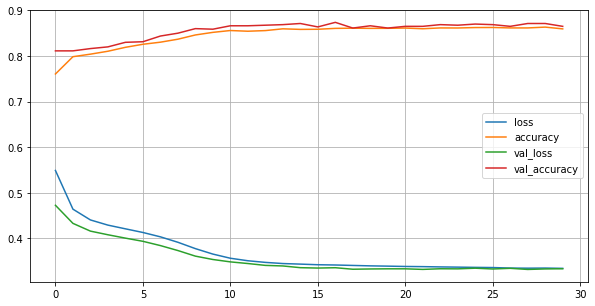

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

learning_data = pd.DataFrame(history.history)
# learning_data.head()
learning_data.plot(figsize=(10,5))
plt.grid(True)
plt.show()

In [105]:
model.evaluate(x_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3437 - accuracy: 0.8570


[0.3436797261238098, 0.8569999933242798]

In [110]:
y_pred = np.round(model.predict(x_test))

In [111]:
print(y_pred.shape)
print(y_test.shape)
y_test = np.array(y_test).reshape(-1,1)
print(y_test.shape)



(2000, 1)
(2000, 1)
(2000, 1)


In [112]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix(y_test,y_pred)



array([[1524,   83],
       [ 203,  190]])

In [114]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1607
           1       0.70      0.48      0.57       393

    accuracy                           0.86      2000
   macro avg       0.79      0.72      0.74      2000
weighted avg       0.85      0.86      0.85      2000

